# Introduction to `pandas`

:::{note}
This material is mostly adapted from the following resources:
- https://earth-env-data-science.github.io/lectures/pandas/pandas_intro.html
- https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter7-pandas.html
:::

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="300px" />

[Pandas](http://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of _tabular_ data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

- A fast and efficient DataFrame object for data manipulation with indexing;
- Tools for reading and writing data: CSV and text files, Excel, SQL;
- Intelligent data alignment and integrated handling of missing data;
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, indexing, and subsetting of large data sets;
- High performance aggregating, merging, joining or transforming data;
- Hierarchical indexing provides an intuitive way of working with high-dimensional data;
- Time series-functionality: date-based indexing, frequency conversion, moving windows, date shifting and lagging;

In [102]:
from IPython.display import Image
Image(url='https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png',
     width=720)

:::{note}
Documentation for this package is available at https://pandas.pydata.org/docs/.
:::

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an **index**. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few. The core constructor is `pd.Series()`.

(Data are from Wikipedia's [List of power stations in Germany](https://en.wikipedia.org/wiki/List_of_power_stations_in_Germany#Nuclear).)

In [104]:
names = ['Neckarwestheim', 'Essenbach', 'Emsland']
values = [1269, 1365, 1290]
s = pd.Series(values, index=names)
s

Neckarwestheim    1269
Essenbach         1365
Emsland           1290
dtype: int64

In [105]:
dictionary = {
    'Neckarwestheim': 1269,
    'Essenbach': 1365,
    'Emsland': 1290,
}
s = pd.Series(dictionary)
s

Neckarwestheim    1269
Essenbach         1365
Emsland           1290
dtype: int64

Arithmetic operations and most `numpy` functions can be applied to `pd.Series`.
An important point is that the Series keep their index during such operations.

In [106]:
np.log(s) / s**0.5

Neckarwestheim    0.200600
Essenbach         0.195391
Emsland           0.199418
dtype: float64

We can access the underlying index object if we need to:

In [107]:
s.index

Index(['Neckarwestheim', 'Essenbach', 'Emsland'], dtype='object')

We can get values back out using the index via the `.loc` attribute

In [108]:
s.loc['Emsland']

1290

Or by raw position using `.iloc`

In [109]:
s.iloc[2]

1290

We can pass a list or array to loc to get multiple rows back:

In [110]:
s.loc[['Neckarwestheim', 'Emsland']]

Neckarwestheim    1269
Emsland           1290
dtype: int64

And we can even use slice notation

In [111]:
s.loc['Neckarwestheim':'Emsland']

Neckarwestheim    1269
Essenbach         1365
Emsland           1290
dtype: int64

In [112]:
s.iloc[:2]

Neckarwestheim    1269
Essenbach         1365
dtype: int64

If we need to, we can always get the raw data back out as well

In [113]:
s.values # a numpy array

array([1269, 1365, 1290])

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single **column**. A more useful Pandas data structure is the **DataFrame**. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

The core constructor is `pd.DataFrame()`

Below we create a DataFrame.

In [114]:
# first we create a dictionary
data = {'capacity': [1269, 1365, 1290], # MW
        'type': ["PWR", "PWR", "PWR"],
        'start_year': [1989, 1988, 1988],
        'end_year': [np.nan, np.nan, np.nan]
       }
df = pd.DataFrame(data, index=['Neckarwestheim', 'Essenbach', 'Emsland'])
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Essenbach,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


We can also switch columns and rows very easily.

In [115]:
df.T

,Neckarwestheim,Essenbach,Emsland
capacity,1269,1365,1290
type,PWR,PWR,PWR
start_year,1989,1988,1988
end_year,NaN,NaN,NaN


A wide range of statistical functions are available on both Series and DataFrames.

In [116]:
df.min()

capacity      1269
type           PWR
start_year    1988
end_year       NaN
dtype: object

In [117]:
df.mean(numeric_only=True)

capacity      1308.000000
start_year    1988.333333
end_year              NaN
dtype: float64

In [118]:
df.std(numeric_only=True)

capacity      50.467812
start_year     0.577350
end_year            NaN
dtype: float64

In [119]:
df.describe()

,capacity,start_year,end_year
count,3.000000,3.000000,0.0
mean,1308.000000,1988.333333,NaN
std,50.467812,0.577350,NaN
min,1269.000000,1988.000000,NaN
25%,1279.500000,1988.000000,NaN
50%,1290.000000,1988.000000,NaN
75%,1327.500000,1988.500000,NaN
max,1365.000000,1989.000000,NaN


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [120]:
df['capacity']

Neckarwestheim    1269
Essenbach         1365
Emsland           1290
Name: capacity, dtype: int64

...or using attribute syntax.

In [121]:
df.capacity

Neckarwestheim    1269
Essenbach         1365
Emsland           1290
Name: capacity, dtype: int64

Indexing works very similar to series

In [122]:
df.loc['Emsland']

capacity      1290
type           PWR
start_year    1988
end_year       NaN
Name: Emsland, dtype: object

In [123]:
df.iloc[2]

capacity      1290
type           PWR
start_year    1988
end_year       NaN
Name: Emsland, dtype: object

But we can also specify the column(s) and row(s) we want to access

In [124]:
df.loc['Emsland', 'start_year']

1988

In [125]:
df.loc[['Emsland', "Neckarwestheim"], ['start_year', "end_year"]]

,start_year,end_year
Emsland,1988,NaN
Neckarwestheim,1989,NaN


In [126]:
df.capacity * 0.8

Neckarwestheim    1015.2
Essenbach         1092.0
Emsland           1032.0
Name: capacity, dtype: float64

Which we can easily add as another column to the DataFrame:

In [127]:
df['reduced_capacity'] = df.capacity * 0.8
df

,capacity,type,start_year,end_year,reduced_capacity
Neckarwestheim,1269,PWR,1989,NaN,1015.2
Essenbach,1365,PWR,1988,NaN,1092.0
Emsland,1290,PWR,1988,NaN,1032.0


We can also remove columns or rows from a DataFrame:

In [128]:
df.drop("reduced_capacity", axis='columns')

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Essenbach,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


We can update the variable `df` by either overwriting `df` or passing an `inplace` keyword:

In [129]:
df.drop("reduced_capacity", axis='columns', inplace=True)

We can also drop columns with only NaN values

In [130]:
df.dropna(axis=1)

,capacity,type,start_year
Neckarwestheim,1269,PWR,1989
Essenbach,1365,PWR,1988
Emsland,1290,PWR,1988


Or fill it up with default "fallback" data:

In [131]:
df.fillna(2023)

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,2023.0
Essenbach,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,2023.0


Say, we already have one value for `end_year` and want to fill up the missing data:

In [132]:
df.loc["Emsland", "end_year"] = 2023

In [133]:
# backward (upwards) fill from non-nan values
df.fillna(method='bfill')

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,2023.0
Essenbach,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,2023.0


## Sorting Data

We can also sort the entries in dataframes, e.g. alphabetically by index or numerically by column values

In [134]:
df.sort_index()

,capacity,type,start_year,end_year
Emsland,1290,PWR,1988,2023.0
Essenbach,1365,PWR,1988,NaN
Neckarwestheim,1269,PWR,1989,NaN


In [135]:
df.sort_values(by='capacity', ascending=False)

,capacity,type,start_year,end_year
Essenbach,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,2023.0
Neckarwestheim,1269,PWR,1989,NaN


If we make a calculation using columns from the DataFrame, it will keep the same index:

## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [136]:
data = {'capacity': [1288, 1360, 1326], # MW
        'type': ["BWR", "PWR", "PWR"],
        'start_year': [1985, 1985, 1986],
        'end_year': [2021, 2021, 2021],
        'x': [10.40, 9.41, 9.35],
        'y': [48.51, 52.03, 53.85]
       }
df2 = pd.DataFrame(data, index=['Gundremmingen', 'Grohnde', 'Brokdorf'])
df2

,capacity,type,start_year,end_year,x,y
Gundremmingen,1288,BWR,1985,2021,10.40,48.51
Grohnde,1360,PWR,1985,2021,9.41,52.03
Brokdorf,1326,PWR,1986,2021,9.35,53.85


We can now add this additional data to the `df` object

In [137]:
df = pd.concat([df, df2])

We can also index using a boolean series obtained from a condition. This is very useful

## Filtering Data

In [138]:
df.capacity > 1300

Neckarwestheim    False
Essenbach          True
Emsland           False
Gundremmingen     False
Grohnde            True
Brokdorf           True
Name: capacity, dtype: bool

In [139]:
df[df.capacity > 1300]

,capacity,type,start_year,end_year,x,y
Essenbach,1365,PWR,1988,NaN,NaN,NaN
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


We can also combine multiple conditions, but need to take care of brackets!

In [140]:
df[(df.capacity > 1300) & (df.start_year >= 1988)]

,capacity,type,start_year,end_year,x,y
Essenbach,1365,PWR,1988,NaN,NaN,NaN


Or we make [SQL-like](https://en.wikipedia.org/wiki/SQL) queries:

In [141]:
df.query("start_year == 1988")

,capacity,type,start_year,end_year,x,y
Essenbach,1365,PWR,1988,NaN,NaN,NaN
Emsland,1290,PWR,1988,2023.0,NaN,NaN


In [142]:
threshold = 1300
df.query("start_year == 1988 and capacity > @threshold")

,capacity,type,start_year,end_year,x,y
Essenbach,1365,PWR,1988,NaN,NaN,NaN


## Modifying Values

We often want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [143]:
df.loc['Essenbach', 'x'] = 12.29
df.loc['Grohnde', 'capacity'] += 1
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Essenbach,1365,PWR,1988,NaN,12.29,NaN
Emsland,1290,PWR,1988,2023.0,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [144]:
operational = ['Neckarwestheim', 'Essenbach', 'Emsland']
df.loc[operational, 'y'] = [49.04, 48.61, 52.47]
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,49.04
Essenbach,1365,PWR,1988,NaN,12.29,48.61
Emsland,1290,PWR,1988,2023.0,NaN,52.47
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


## Applying Functions

Sometimes it can be useful apply a function to all values of a column/row. For instance, we might be interested in normalised capacities relative to the largest nuclear power plant:

In [145]:
df.capacity.apply(lambda x: x / df.capacity.max())

Neckarwestheim    0.929670
Essenbach         1.000000
Emsland           0.945055
Gundremmingen     0.943590
Grohnde           0.997070
Brokdorf          0.971429
Name: capacity, dtype: float64

In [146]:
df.capacity.map(lambda x: x / df.capacity.max())

Neckarwestheim    0.929670
Essenbach         1.000000
Emsland           0.945055
Gundremmingen     0.943590
Grohnde           0.997070
Brokdorf          0.971429
Name: capacity, dtype: float64

For simple functions, there's often an easier alternative:

In [147]:
df.capacity / df.capacity.max()

Neckarwestheim    0.929670
Essenbach         1.000000
Emsland           0.945055
Gundremmingen     0.943590
Grohnde           0.997070
Brokdorf          0.971429
Name: capacity, dtype: float64

But `.apply()` and `.map()` often give you more flexibility.

## Renaming Indices / Columns

Sometimes it can be useful to rename columns:

In [148]:
df.rename(columns=dict(x='lat', y='lon'))

,capacity,type,start_year,end_year,lat,lon
Neckarwestheim,1269,PWR,1989,NaN,NaN,49.04
Essenbach,1365,PWR,1988,NaN,12.29,48.61
Emsland,1290,PWR,1988,2023.0,NaN,52.47
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


## Replacing Values

Sometimes it can be useful to replace values:

In [149]:
df.replace({'PWR': "Pressurized water reactor"})

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,Pressurized water reactor,1989,NaN,NaN,49.04
Essenbach,1365,Pressurized water reactor,1988,NaN,12.29,48.61
Emsland,1290,Pressurized water reactor,1988,2023.0,NaN,52.47
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,Pressurized water reactor,1985,2021.0,9.41,52.03
Brokdorf,1326,Pressurized water reactor,1986,2021.0,9.35,53.85


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

<AxesSubplot:xlabel='start_year', ylabel='capacity'>

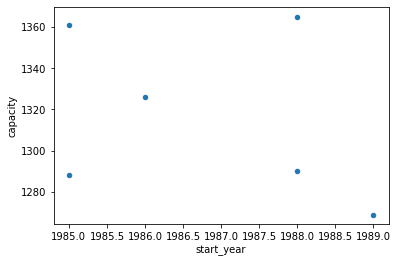

In [150]:
df.plot(kind='scatter', x='start_year', y='capacity')

<AxesSubplot:>

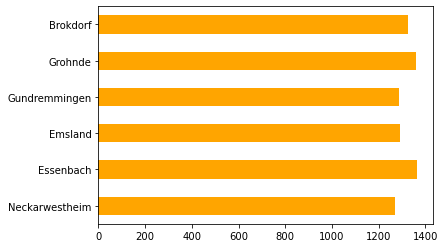

In [151]:
df.capacity.plot.barh(color='orange')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

<AxesSubplot:>

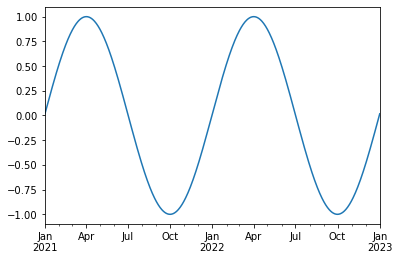

In [152]:
time = pd.date_range(start='2021-01-01', end='2023-01-01', freq='D')
values = np.sin(2 * np.pi * time.dayofyear / 365)
ts = pd.Series(values, index=time)
ts.plot()

We can use python's slicing notation inside `.loc` to select a date range.

<AxesSubplot:>

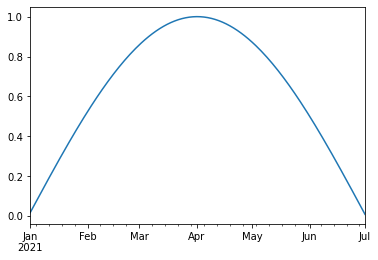

In [153]:
ts.loc['2021-01-01':'2021-07-01'].plot()

<AxesSubplot:>

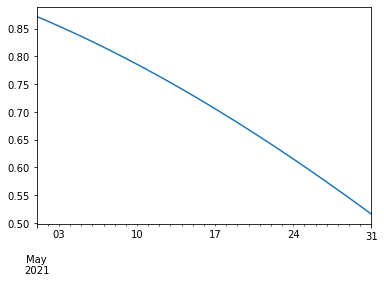

In [154]:
ts.loc['2021-05'].plot()

The TimeIndex object has lots of useful attributes

In [155]:
ts.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=731)

In [156]:
ts.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
           dtype='int64', length=731)

Another common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling) function. The resample periods are specified using pandas [offset index](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) syntax.

Below we resample the dataset by taking the mean over each month.

In [157]:
ts.resample("M").mean().head()

2021-01-31    0.268746
2021-02-28    0.698782
2021-03-31    0.949778
2021-04-30    0.959332
2021-05-31    0.709200
Freq: M, dtype: float64

<AxesSubplot:>

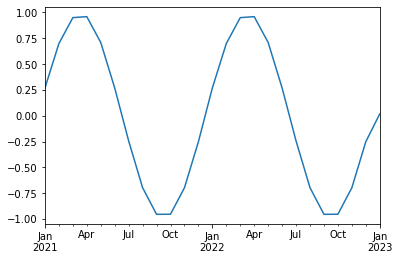

In [158]:
ts.resample("M").mean().plot()

## Reading and Writing Files

To read data into pandas, we can use for instance the [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly powerful and complex with a multitude of settings. You can use it to extract data from almost any text file.

The `pd.read_csv()` function can take a path to a local file as an input or even a link to an online text file.

Let's import a slightly larger dataset about the power plant fleet in Europe

In [159]:
fn = "https://raw.githubusercontent.com/PyPSA/powerplantmatching/master/powerplants.csv"

In [160]:
df = pd.read_csv(fn, index_col=0)
df.iloc[:5,:10]

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut
id,,,,,,,,,,
0,Doel,Nuclear,Steam Turbine,PP,Belgium,2911.0,NaN,1975.0,NaN,2022.0
1,Sarrans,Hydro,Reservoir,Store,France,183.0,NaN,1932.0,NaN,NaN
2,Pragneres,Hydro,Reservoir,Store,France,189.2,NaN,1953.0,NaN,NaN
3,Revin,Hydro,Pumped Storage,Store,France,808.0,NaN,1974.0,NaN,NaN
4,Rhinau,Hydro,Run-Of-River,PP,France,152.0,NaN,2016.0,2016.0,NaN


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 0 to 5076
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 5010 non-null   object 
 1   Fueltype             5010 non-null   object 
 2   Technology           3987 non-null   object 
 3   Set                  5010 non-null   object 
 4   Country              5010 non-null   object 
 5   Capacity             5010 non-null   float64
 6   Efficiency           510 non-null    float64
 7   DateIn               2976 non-null   float64
 8   DateRetrofit         1832 non-null   float64
 9   DateOut              154 non-null    float64
 10  lat                  5010 non-null   float64
 11  lon                  5010 non-null   float64
 12  Duration             448 non-null    float64
 13  Volume_Mm3           5010 non-null   float64
 14  DamHeight_m          5010 non-null   float64
 15  StorageCapacity_MWh  5010 non-null   f

In [162]:
df.describe()

,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh
count,5010.000000,510.000000,2976.000000,1832.000000,154.000000,5010.000000,5010.000000,448.000000,5010.000000,5010.000000,5.010000e+03
mean,151.363414,0.486821,1980.047715,1984.816048,2026.883117,48.844509,8.511741,1202.280996,14.637022,8.233239,1.807718e+03
std,412.728137,0.180187,24.986943,25.003845,8.234272,7.054305,8.648696,1610.022363,178.497746,59.251280,4.897179e+04
min,0.000000,0.187765,1899.000000,1899.000000,2020.000000,35.003800,-9.422700,0.007907,0.000000,0.000000,0.000000e+00
25%,4.600000,0.359237,1962.000000,1966.750000,2021.000000,43.450527,2.340625,33.280117,0.000000,0.000000,0.000000e+00
50%,24.000000,0.389400,1982.000000,1991.000000,2024.000000,47.653396,8.902054,636.146377,0.000000,0.000000,0.000000e+00
75%,92.000000,0.589875,2003.000000,2005.000000,2029.000000,51.641645,13.025138,1861.401642,0.000000,0.000000,0.000000e+00
max,5460.000000,0.917460,2022.000000,2020.000000,2051.000000,70.409578,39.262400,16840.000000,9500.000000,1800.000000,3.120000e+06


Sometimes, we also want to store a DataFrame for later use. There are many different file formats tabular data can be stored in,  including HTML, JSON, Excel, Parquet, Feather, etc. Here, let's say we want to store the DataFrame as CSV (comma-separated values) file under the name "powerplants.csv".

In [163]:
df.to_csv("powerplants.csv")

## Groupby Functionality

Both `Series` and `DataFrame` objects have a `groupby` method. It accepts a variety of arguments, but the simplest way to think about it is that you pass another series, whose unique values are used to split the original object into different groups. `groupby` is an amazingly powerful but also complex function.

Here's an example which retrieves the total generation capacity per country.

In [164]:
grouped = df.groupby("Country").Capacity.sum()
grouped.head()

Country
Albania                    1636.208275
Austria                   17722.520000
Belgium                   13666.055947
Bosnia and Herzegovina     2127.500000
Bulgaria                   9572.486363
Name: Capacity, dtype: float64

Such **“chaining”** operations together is very common with pandas:

Let's break apart this operation a bit. The workflow with `groupby` can be divided into three general steps:

1. **Split**: Partition the data into different groups based on some criterion.
1. **Apply**: Do some caclulation within each group. Different types of steps might be
   - *Aggregation*: Get the mean or max within the group.
   - *Transformation*: Normalize all the values within a group
   - *Filtration*: Eliminate some groups based on a criterion.
1. **Combine**: Put the results back together into a single object.

![split-apply-combine](https://miro.medium.com/max/1840/1*JbF6nhrQsn4f-TaSF6IR9g.png)


In [165]:
gb = df.groupby('Country')
gb

The length tells us how many groups were found:

In [166]:
len(gb)

33

All of the groups are available as a dictionary via the `.groups` attribute:

In [167]:
groups = gb.groups
len(groups)

33

In [168]:
list(groups.keys())[:5]

['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria']

Now that we know how to create a `GroupBy` object, let's learn how to do aggregation on it.

In [169]:
gb.Capacity.sum().nlargest(5)

Country
Germany           104246.894396
France             98319.699420
Spain              85980.832222
Italy              79086.907019
United Kingdom     69902.466414
Name: Capacity, dtype: float64

In [170]:
gb["DateIn"].mean().head()

Country
Albania                   1976.666667
Austria                   1972.566176
Belgium                   1987.031250
Bosnia and Herzegovina    1979.333333
Bulgaria                  1973.130435
Name: DateIn, dtype: float64

Grouping is not only possible on a single columns, but also on multiple columns. For instance,
we might want to group the capacities by country **and** fuel type. To achieve this, we pass a list of functions to the `groupby` functions.

In [171]:
capacities = df.groupby(["Country", "Fueltype"]).Capacity.sum()
capacities

Country         Fueltype   
Albania         Hydro           1546.353732
                Oil               89.854543
Austria         Hard Coal        578.400000
                Hydro          12726.420000
                Natural Gas     4417.700000
                                   ...     
United Kingdom  Nuclear        11239.000000
                Oil              100.000000
                Other             55.000000
                Waste            498.900000
                Wind            3401.000000
Name: Capacity, Length: 153, dtype: float64

By grouping by multiple attributes, our index becomes a `pd.MultiIndex` (a hierarchical index with multiple *levels*.

In [172]:
capacities.index[:5]

MultiIndex([('Albania',       'Hydro'),
            ('Albania',         'Oil'),
            ('Austria',   'Hard Coal'),
            ('Austria',       'Hydro'),
            ('Austria', 'Natural Gas')],
           names=['Country', 'Fueltype'])

In [173]:
type(capacities.index)

pandas.core.indexes.multi.MultiIndex

We can use the `.unstack` function to reshape the multi-indexed `pd.Series` into a `pd.DataFrame` which has the second index level as columns. 

In [174]:
capacities.unstack().tail().T

Country,Spain,Sweden,Switzerland,Ukraine,United Kingdom
Fueltype,,,,,
Bioenergy,20.000000,220.000000,NaN,NaN,187.300000
Geothermal,NaN,NaN,NaN,NaN,NaN
Hard Coal,9492.767594,0.000000,NaN,23206.997071,12059.890974
Hydro,25762.867247,13958.718931,18292.0,4806.212023,9645.700000
Lignite,1267.946871,NaN,NaN,NaN,NaN
Natural Gas,23587.497259,1091.000000,NaN,NaN,32715.675440
Nuclear,7117.200000,8617.000000,3348.0,12443.698212,11239.000000
Oil,2703.935294,1435.000000,NaN,NaN,100.000000
Other,1053.980957,NaN,NaN,NaN,55.000000


## Exercises

### Power Plants Data

Run the function `.describe()` on the DataFrame that includes the power plant database:

In [175]:
# your code here

Provide a list of unique fuel types included in the dataset

In [176]:
# your code here

Provide a list of unique technologies included in the dataset

In [177]:
# your code here

Filter the dataset by power plants with the fuel type "Hard Coal"

In [178]:
# your code here

Identify the 5 largest coal power plants. In which countries are they located? When were they built?

In [179]:
# your code here

Identify the power plant with the longest "Name".

In [180]:
# your code here

Identify the 10 northernmost powerplants. What type of power plants are they?

In [181]:
# your code here

What is the average "DateIn" of each "Fueltype"? Which type of power plants is the oldest on average?

In [182]:
# your code here

Plot a histogram of power plant capacities with bins of length 100 MW between 0 and 4000 MW. What do you observe?

In [183]:
# your code here

How many power plants of each fuel type are there in each country? Display the results in a DataFrame with countries as index and fuel type as columns. Fill missing values with the value zero. Convert all values to integers.

> Browse Google or the pandas documentation to find the right aggregation function to count values.

In [184]:
# your code here

### Time Series Analysis

Read in the time series from the second lecture into a pandas DataFrame.

The file is available at https://raw.githubusercontent.com/fneum/data-science-for-esm/main/data-science-for-esm/time-series-lecture-2.csv. and includes hourly time series for Germany in 2015 for:
    
1. electricity demand from [OPSD](https://open-power-system-data.org/) in GW
2. onshore wind capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
3. offshore wind capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
4. solar PV capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
5. electricity day-ahead spot market prices in €/MWh from EPEX Spot zone DE/AT/LU retrieved via [SMARD platform](https://www.smard.de/home)

Use the function `pd.read_csv` with the keyword arguments `index_col=` and `parse_dates=` to ensure the
time stamps are treated as `pd.DatetimeIndex`.

In [185]:
# your code here

The start of the dataframe should look like this:

|                     |   load |   onwind |   offwind |   solar |   prices |
|:--------------------|-------:|---------:|----------:|--------:|---------:|
| 2015-01-01 00:00:00 | 41.151 |   0.1566 |    0.703  |       0 |      nan |
| 2015-01-01 01:00:00 | 40.135 |   0.1659 |    0.6875 |       0 |      nan |
| 2015-01-01 02:00:00 | 39.106 |   0.1746 |    0.6535 |       0 |      nan |
| 2015-01-01 03:00:00 | 38.765 |   0.1745 |    0.6803 |       0 |      nan |
| 2015-01-01 04:00:00 | 38.941 |   0.1826 |    0.7272 |       0 |      nan |

And it should pass the following test:

In [186]:
assert type(df.index) == pd.DatetimeIndex

AssertionError: 

For each column:
- What are the average, minimum and maximum values?
- Find the time stamps where data on prices is missing.
- Fill up the missing data with the prices observed one week ahead.
- Plot the time series for the full year.
- Plot the time series for the month May.
- Resample the time series to daily, weeky, and monthly frequencies and plot the resulting time series in one graph.
- Sort the values in descending order and plot the duration curve. *Hint: Run `.reset_index(drop=True)` to drop the index after sorting.*
- Plot a histogram of the time series values.
- Perform a Fourier transformation of the time series. What are the dominant frequencies? *Hint: Below you can find an example how Fourier transformation can be down with `numpy`.*
- Calculate the Pearson correlation coefficients between all time series. *Hint: There is a function for that. Google for "pandas dataframe correlation".*

In [ ]:
abs(pd.Series(np.fft.rfft(df.solar - df.solar.mean()), index=np.fft.rfftfreq(len(df.solar), d=1./8760))**2)

In [ ]:
# your code here